## importing library

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

## data preprocessing

## image preprocesing

In [3]:
training_set=tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

    
)

Found 70295 files belonging to 38 classes.


## validation image preprocesing

In [4]:
valiodation_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 17572 files belonging to 38 classes.


training_set

In [6]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[165.25 163.25 177.25]
   [164.25 162.25 176.25]
   [167.5  165.5  179.5 ]
   ...
   [202.75 199.75 208.75]
   [200.5  197.5  206.5 ]
   [209.25 206.25 215.25]]

  [[167.75 165.75 179.75]
   [171.75 169.75 183.75]
   [169.5  167.5  181.5 ]
   ...
   [199.5  196.5  205.5 ]
   [200.   197.   206.  ]
   [201.   198.   207.  ]]

  [[174.5  172.5  186.5 ]
   [171.5  169.5  183.5 ]
   [171.75 169.75 183.75]
   ...
   [204.75 201.75 210.75]
   [208.5  205.5  214.5 ]
   [210.75 207.75 216.75]]

  ...

  [[120.   114.   126.  ]
   [108.25 102.25 114.25]
   [117.   111.   123.  ]
   ...
   [119.75 111.75 124.75]
   [114.75 106.75 119.75]
   [125.   117.   130.  ]]

  [[118.5  112.5  124.5 ]
   [102.25  96.25 108.25]
   [119.75 113.75 125.75]
   ...
   [114.25 106.25 119.25]
   [120.   112.   125.  ]
   [125.   117.   130.  ]]

  [[108.   102.   114.  ]
   [112.25 106.25 118.25]
   [105.5   99.5  111.5 ]
   ...
   [116.   108.   121.  ]
   [111.75 103.75 116.75]
   [119.25 111.25 12

## to avoid overshooting
1. choose small learning rate 0.0001
2. there may be chance of underfitting increase number of neurons
3. add more convolution layer to extract more feutures from image there may be possibility that model is confusing to lack of feuture so add more feutures

## building mode


In [40]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential


In [41]:
model=Sequential()

In [42]:
## building convolution

In [43]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(128, 128, 3)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))  # Added padding='same'
model.add(MaxPool2D(pool_size=2, strides=2))
# Additional layers may need to be added cautiously with appropriate image dimensions.


In [44]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [45]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [46]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))



In [47]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))


In [48]:
model.add(Dropout(0.25)) #to avoid overfitting

In [49]:
model.add(Flatten())


In [50]:
model.add(Dense(units=1500,activation='relu'))

In [51]:
model.add(Dropout(0.4))

In [52]:
model.add(Dense(units=38,activation='softmax'))

## compiling mode


In [53]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_29 (Conv2D)          (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 conv2d_31 (Conv2D)          (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                 

## training model

In [55]:
training_history=model.fit(x=training_set,validation_data=valiodation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 241s 108ms/step - loss: 1.3048 - accuracy: 0.6175 - val_loss: 0.4385 - val_accuracy: 0.8615
Epoch 2/10
2197/2197 [==============================] - 227s 103ms/step - loss: 0.4049 - accuracy: 0.8725 - val_loss: 0.2368 - val_accuracy: 0.9230
Epoch 3/10
2197/2197 [==============================] - 230s 105ms/step - loss: 0.2353 - accuracy: 0.9236 - val_loss: 0.1727 - val_accuracy: 0.9429
Epoch 4/10
2197/2197 [==============================] - 225s 103ms/step - loss: 0.1628 - accuracy: 0.9453 - val_loss: 0.1758 - val_accuracy: 0.9422
Epoch 5/10
2197/2197 [==============================] - 229s 104ms/step - loss: 0.1178 - accuracy: 0.9603 - val_loss: 0.1346 - val_accuracy: 0.9560
Epoch 6/10
2197/2197 [==============================] - 229s 104ms/step - loss: 0.0959 - accuracy: 0.9680 - val_loss: 0.1428 - val_accuracy: 0.9533
Epoch 7/10
2197/2197 [==============================] - 228s 104ms/step - loss: 0.0797 - accuracy: 0.9733 - val_

## model evaluation

In [56]:
#model eval on training set
train_loss,train_acc=model.evaluate(training_set)

2197/2197 [==============================] - 76s 35ms/step - loss: 0.0458 - accuracy: 0.9849


In [57]:
print(train_loss,train_acc)

0.04580724239349365 0.9849491715431213


In [58]:
#model on validation set
val_loss,val_acc=model.evaluate(valiodation_set)

550/550 [==============================] - 19s 34ms/step - loss: 0.1476 - accuracy: 0.9557


In [59]:
print(val_loss,val_acc)

0.14758118987083435 0.9556680917739868


## saving mode


In [61]:
model.save("trained_model.keras")

In [62]:
training_history.history

{'loss': [1.3047616481781006,
  0.40494614839553833,
  0.23533965647220612,
  0.16279172897338867,
  0.11779730767011642,
  0.09593763947486877,
  0.07966498285531998,
  0.0679139569401741,
  0.055696845054626465,
  0.05070383846759796],
 'accuracy': [0.6174692511558533,
  0.8724944591522217,
  0.923579216003418,
  0.9453161954879761,
  0.9603243470191956,
  0.9679920077323914,
  0.973312497138977,
  0.9778931736946106,
  0.9818906188011169,
  0.9831424951553345],
 'val_loss': [0.43845075368881226,
  0.2368258237838745,
  0.17273983359336853,
  0.175806924700737,
  0.1345566064119339,
  0.14279597997665405,
  0.14356422424316406,
  0.13971687853336334,
  0.10126164555549622,
  0.14758135378360748],
 'val_accuracy': [0.861484169960022,
  0.9230024814605713,
  0.9428636431694031,
  0.9421807527542114,
  0.9559526443481445,
  0.9532779455184937,
  0.9555543065071106,
  0.9574891924858093,
  0.9680742025375366,
  0.9556680917739868]}

In [65]:
import json

# Save training history to a JSON file
with open("training_hist.json", "w") as f:
    json.dump(training_history.history, f)


## accuracy visualiztion

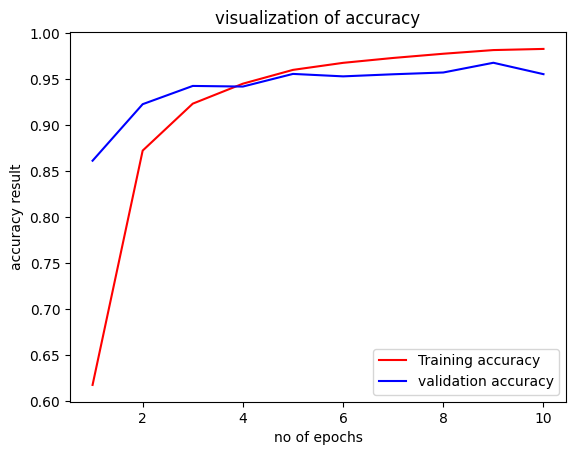

In [77]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history.history["accuracy"],color='red',label='Training accuracy')
plt.plot(epochs,training_history.history["val_accuracy"],color='blue',label='validation accuracy')
plt.xlabel("no of epochs")
plt.ylabel("accuracy result")
plt.title("visualization of accuracy")
plt.legend()
plt.show()

## some other matrix model eval

In [78]:
class_name=valiodation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [79]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,#sequential passing not randomly chosing
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 17572 files belonging to 38 classes.


In [81]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 17s 30ms/step


(array([[1.0000000e+00, 3.2965214e-14, 1.4993159e-10, ..., 4.1386944e-21,
         9.4328163e-21, 2.9702771e-19],
        [9.9999988e-01, 2.8425607e-13, 2.7060971e-09, ..., 6.1205972e-17,
         3.8628342e-17, 1.2461928e-14],
        [1.0000000e+00, 1.6984467e-12, 1.1220836e-10, ..., 4.9599023e-17,
         1.2029901e-16, 1.7457276e-14],
        ...,
        [1.5950977e-10, 1.8669087e-13, 1.1913923e-09, ..., 2.6954057e-11,
         2.5587080e-12, 9.9998295e-01],
        [6.2870031e-10, 1.5929203e-14, 1.5480427e-10, ..., 2.1445914e-11,
         7.9773162e-13, 1.0000000e+00],
        [5.9956280e-12, 2.0189606e-16, 4.2417377e-15, ..., 1.9215158e-15,
         1.7299796e-14, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [82]:
predicted_categories=tf.argmax(y_pred,axis=1) #extract max value argmax

In [83]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [84]:
true_categories=tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [86]:
y_true=tf.argmax(true_categories,axis=1) #extract max value argmax
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

## precison recall

In [91]:
from sklearn.metrics import classification_report,confusion_matrix

In [92]:
print(classification_report(y_true, predicted_categories, target_names=class_name))


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.98      0.97       504
                                 Apple___Black_rot       0.98      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.96      0.98      0.97       440
                                   Apple___healthy       0.93      0.96      0.95       502
                               Blueberry___healthy       0.94      0.99      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.95      0.99      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.90      0.93       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.91      0.97      0.

In [96]:
cm = confusion_matrix(y_true,predicted_categories)
cm.shape # predicted and true 38*38

(38, 38)

## confusion matrix visualization

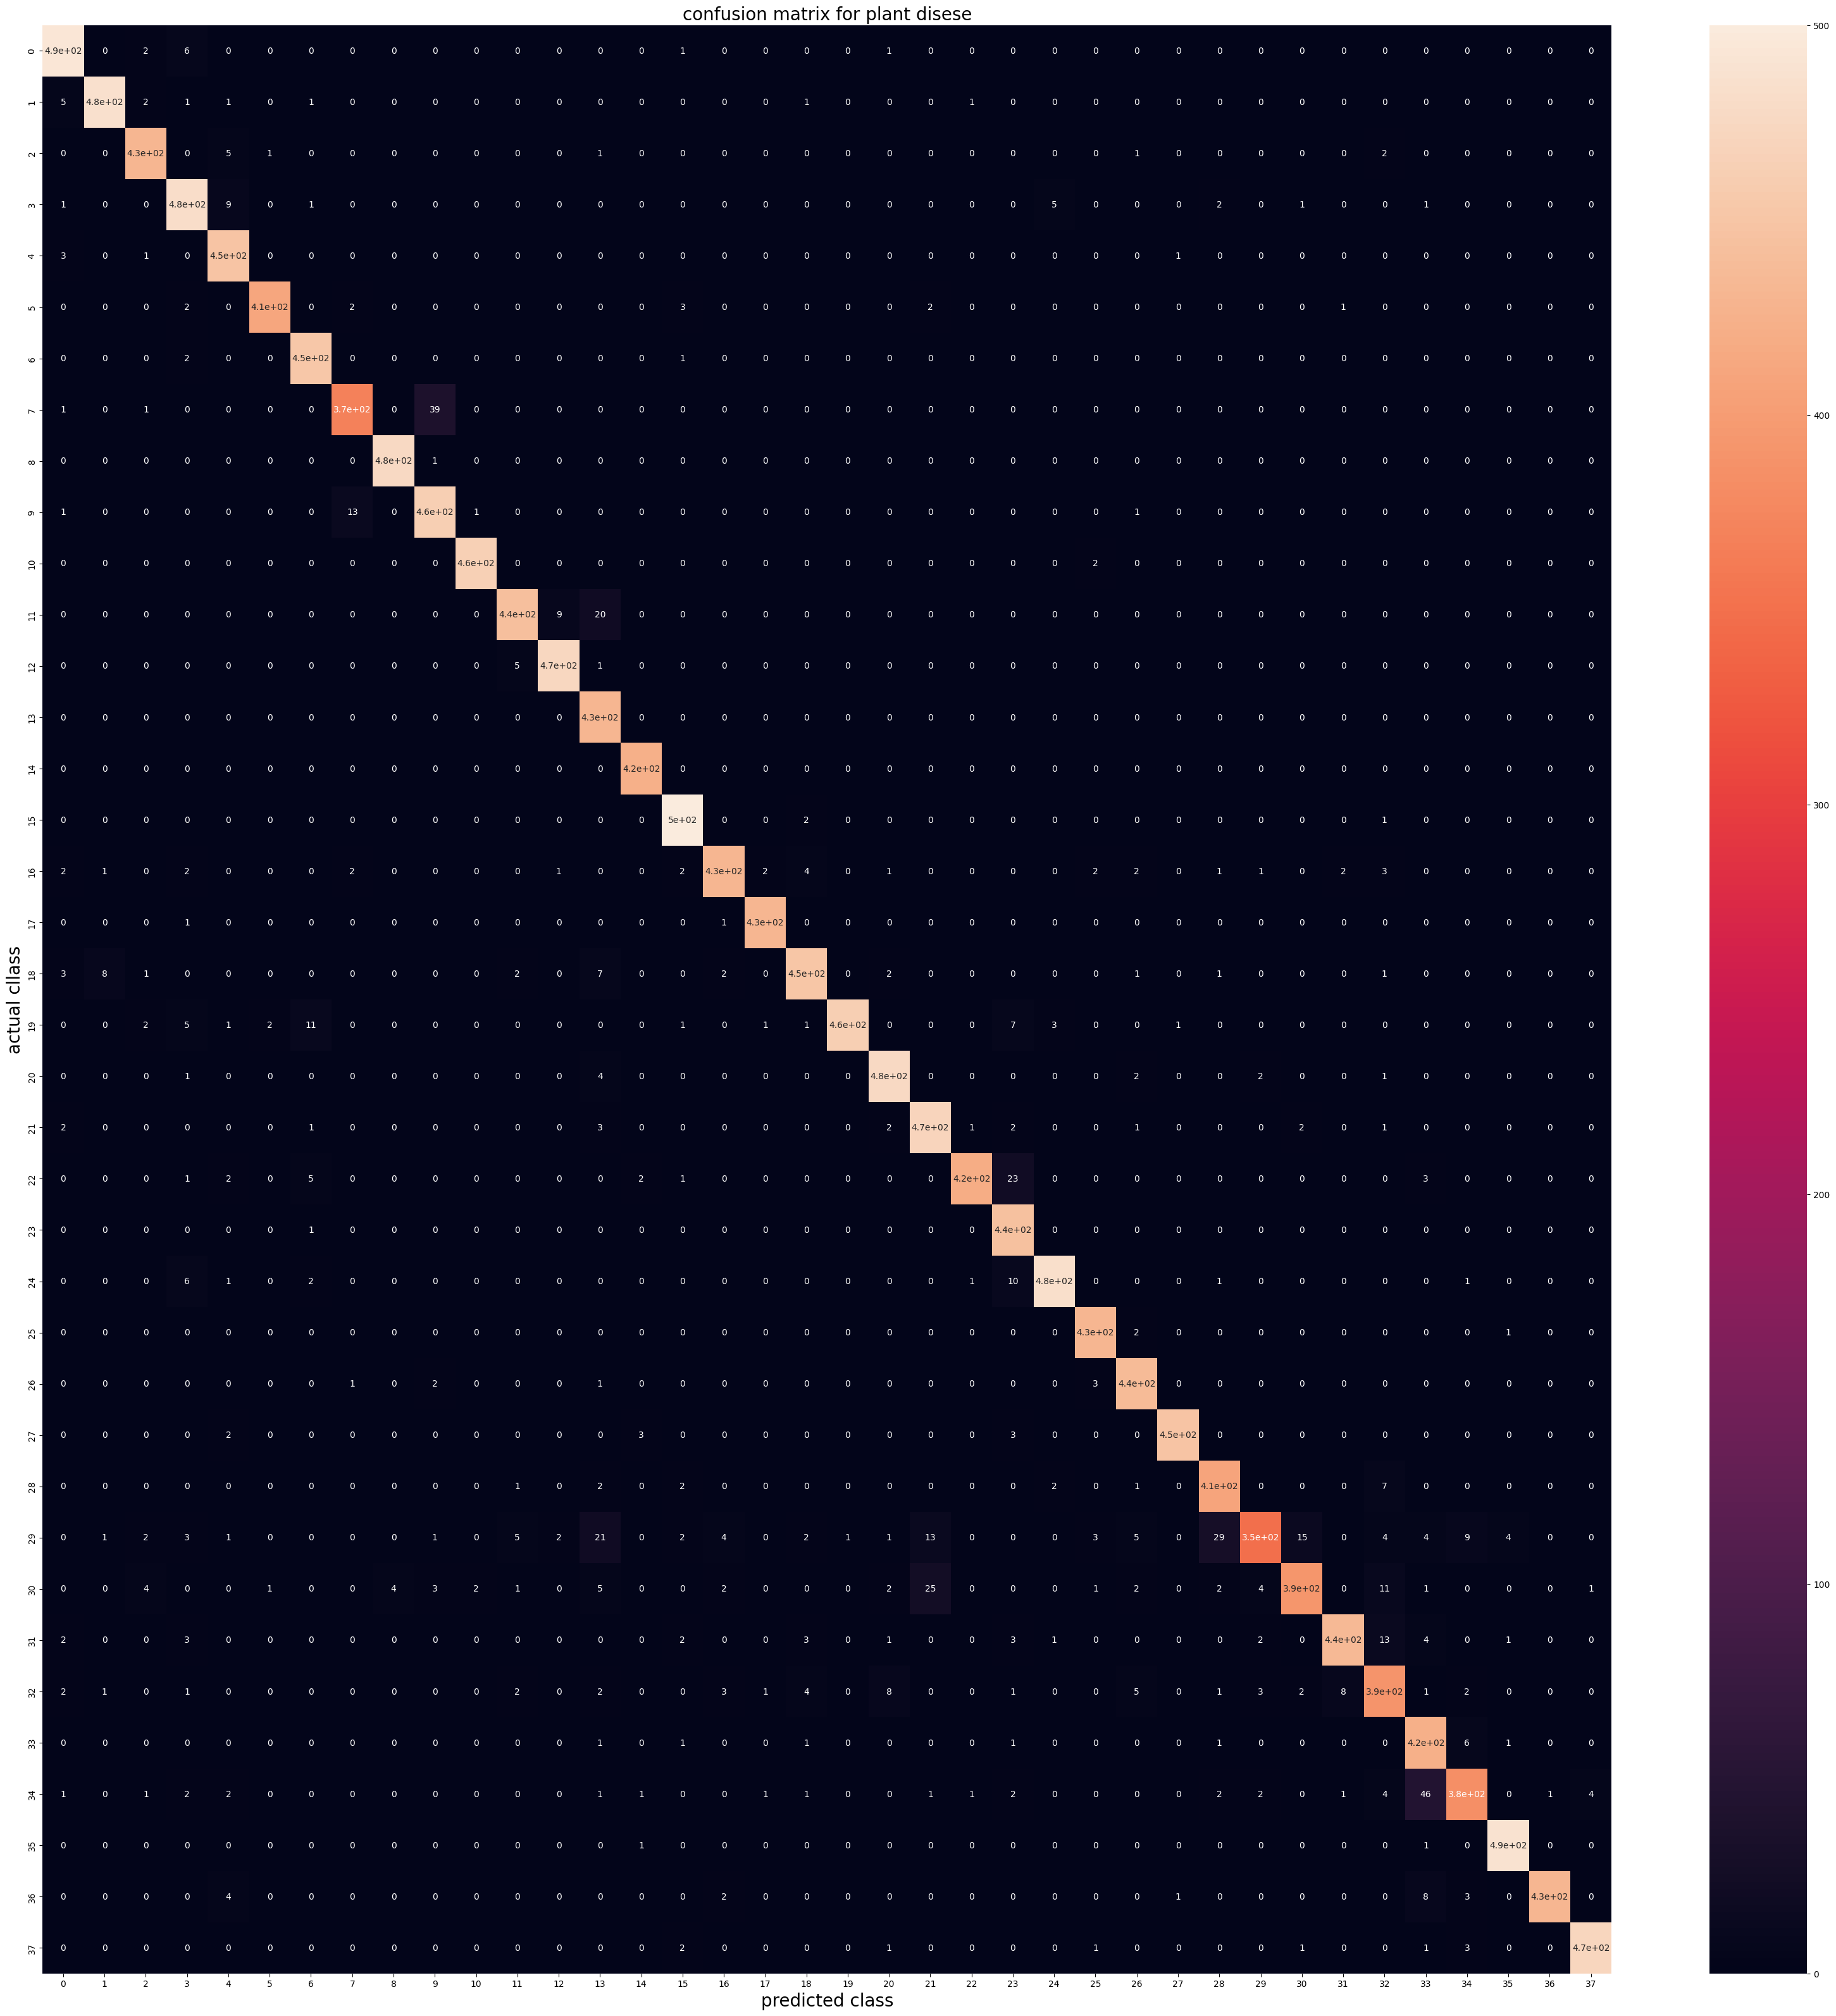

In [106]:
plt.figure(figsize=[40,40])
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("predicted class",fontsize=20)
plt.ylabel("actual cllass",fontsize=20)
plt.title("confusion matrix for plant disese",fontsize=20)
plt.show()
